In [97]:
from utils import *
import pandas as pd
import statsmodels.api as sm

In [133]:
mk1, mk2, mk3 = "Mk1", "Mk2", "Mk3"
new_xls = pd.ExcelFile("ridge_data_10_poly3.xls")
old_xls = pd.ExcelFile("data14.xls")
old_sheetnames = [sheetname for sheetname in old_xls.sheet_names if "Follower" in sheetname and "Dummy" not in sheetname]
sorted(new_xls.sheet_names, reverse=True)

['DATA 04-05-2018 23.07.08 (Mk2)',
 'DATA 04-05-2018 23.06.51 (Mk1)',
 'DATA 04-05-2018 23.06.07 (Mk3)']

In [137]:
### SET FOLLOWER TYPE HERE
F_TYPE = mk2

In [138]:
historic_data = get_data_for(F_TYPE, old_xls)
new_data = get_data_for(F_TYPE, new_xls, sorted(new_xls.sheet_names, reverse=True))

## grab leader and follower prices
x, y = get_historic_prices_xy(historic_data)
xhat, yhat = get_prices_xy(new_data)

## add column of 1's to x values
x = sm.add_constant(x)

In [139]:
new_data

,Date,Leader Price,Follower Price,Cost,Leader Payoff
0,101.0,1.776742,1.700740,1,0.569725
1,102.0,1.773067,1.704708,1,0.570791
2,103.0,1.771832,1.648514,1,0.557820
3,104.0,1.771793,1.655997,1,0.559555
4,105.0,1.774930,1.659621,1,0.560241
5,106.0,1.771580,1.678479,1,0.564769
6,107.0,1.773394,1.720689,1,0.574487
7,108.0,1.773248,1.648933,1,0.557846
8,109.0,1.773158,1.702744,1,0.570332
9,110.0,1.773081,1.675349,1,0.563981


In [15]:
mpinv = np.linalg.pinv(x)
result = mpinv.dot(y)
b0 = result[1] ## slope
b1 = result[0] ## intercept

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (b0,b1))

Linear regression using Moore-Penrose inverse
parameters: a=0.40 b=1.10


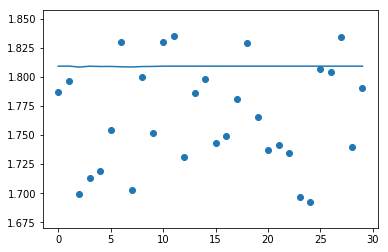

In [8]:
## plot new data with historic line of best fit. 
#plotscat(x, y, lambda x: x*b0 + b1)
plotscat(xhat, yhat, lambda x: x*b0 + b1)